In [0]:
from zipfile import ZipFile
file_name = "CK+48.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [0]:
import cv2
import glob
import numpy as np
import dlib
import matplotlib.pyplot as plt
import os
print(os.listdir("CK+48"))

['sadness', 'surprise', 'anger', 'fear', 'contempt', 'disgust', 'happy']


In [0]:
#data_path = 'CK+48'
#data_dir_list = os.listdir(data_path)
#img_data_list = []
#for dataset in data_dir_list:
  #img_list = os.listdir(data_path+'/'+dataset)
  #print('Loaded the images of dataset-'+'{}\n'.format(dataset))
  #for img in img_list:
    #input_img = cv2.imread(data_path + '/' + dataset+ '/'+img)
    #face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    #gray = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    #input_image_resize = cv2.resize(gray,(48,48))
    #img_data_list.append(input_image_resize)
  #print(img_data_list)
#img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
#img_data = img_data/255
#img_data.shape

In [0]:
path_lists = []
matrix_lists = []
for folder_name in os.listdir('/content/CK+48'):
  path_1 = os.path.join('/content/CK+48',folder_name)
  for file_name in os.listdir(path_1):
    path_2 = os.path.join(path_1,file_name)
    if os.path.isfile(path_2):
      path_lists.append(path_2)
      image = cv2.imread(path_2)
      matrix_lists.append(image)
print(matrix_lists)

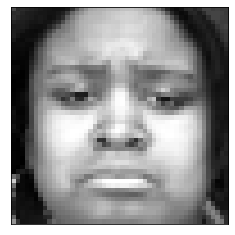

In [0]:
#frontal face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread(path_lists[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,5,minSize=(100,100))
x=y=w=h=0
for (i,j,k,l) in faces:
  cv2.rectangle(img,(i,j),(i+k,j+l),(0,0,255),10)
  x = i
  y = j
  w = k
  h = l
  break
plt.grid(None)
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)
cropped_img = gray[y:y+h,x:x+w]
plt.imshow(img)


In [0]:
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [0]:
#for i in range(len(path_lists)):
  #img = cv2.imread(path_lists[i])


In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread(path_lists[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.1,4)
print(faces)

[[ 4  2 41 41]]


4 2 45 43


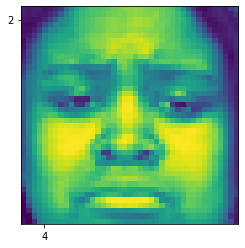

In [0]:
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),10)
#plt.grid(None)
plt.xticks([4,41])
plt.yticks([2,41])
imgplot = plt.imshow(img)
print(x,y,x+w,y+h)
cropped_img = gray[y:y+h,x:x+w]
plt.imshow(cropped_img)

In [0]:
#Method_1 of alignment
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_5_face_landmarks.dat.bz2"

--2020-06-15 05:17:43--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  2.84MB/s    in 1.9s    

2020-06-15 05:17:45 (2.84 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]

bunzip2: Output file shape_predictor_5_face_landmarks.dat already exists.


In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

In [0]:
img = cv2.imread(path_lists[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rects = detector(gray,0)
if len(rects)>0:
  for rect in rects:
    x= rect.left()
    y = rect.top()
    w = rect.right()
    h = rect.bottom()
    shape = predictor(gray,rect)

In [0]:
def shape_to_normal(shape):
  shape_normal = []
  for i in range(0,5):
    shape_normal.append((i,(shape.part(i).x,shape.part(i).y)))
  return shape_normal
def get_eyes_nose_dlib(shape):
  nose = shape[4][1]
  left_eye_x = int(shape[3][1][0] + shape[2][1][0])//2
  left_eye_y = int(shape[3][1][1] + shape[2][1][1])//2
  right_eye_x = int(shape[1][1][0] + shape[0][1][0])//2
  right_eye_y = int(shape[1][1][1] + shape[0][1][1])//2
  return nose,(left_eye_x,left_eye_y),(right_eye_x,right_eye_y) 


In [0]:
shape = shape_to_normal(shape)
nose,left_eye,right_eye = get_eyes_nose_dlib(shape)

center_of_forehead = ((left_eye[0]+right_eye[0])//2,(left_eye[1]+right_eye[1])//2)
center_pred = (int((x+w)/2),int((y+h)/2))

NameError: ignored

In [0]:
#Method_2 of alignment
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread(path_lists[0])
new_faces = face_cascade.detectMultiScale(img,1.3,5)
face_x,face_y,face_w,face_h = new_faces[0]
img = img[int(face_y):int(face_y + face_h),int(face_x):int(face_x + face_w)]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
img_raw = gray.copy()

IndexError: ignored